In [1]:
#importing libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import math as math
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier

In [2]:
#reading excle file
df = pd.read_excel('Mini_protein_data_Ha_Mini_dataset_1_1_for_ml.xlsx')

In [3]:
df

,Category_0-1_2_3_4,Mono_total_score,Mono_AlaCount,Mono_bb,Mono_buried_minus_exposed,Mono_buried_np,Mono_buried_over_exposed,Mono_cavity_volume,Mono_contact_all,Mono_contact_core_SASA,...,Core_res_w,Core_res_I,Core_total,Positive_charge_H,Positive_charge_K,Positive_charge_R,Positive_total,Negative_charge_D,Negative_charge_E,Negative_total
0,1,-2.61,0.08,-0.01,62.37,110.03,0.06,0.40,2.14,1.85,...,0,2,8,1,1,2,4,3,1,4
1,1,-2.51,0.08,-0.01,61.72,108.79,0.06,0.09,1.51,1.28,...,0,2,8,0,1,2,3,3,1,4
2,1,-2.07,0.08,-0.01,64.81,112.10,0.06,0.38,2.22,1.93,...,0,2,9,0,1,2,3,3,1,4
3,1,-2.45,0.08,-0.01,64.23,110.45,0.06,0.61,1.69,1.95,...,0,2,8,0,1,2,3,3,2,5
4,1,-2.42,0.08,-0.01,61.99,107.68,0.06,0.18,1.56,1.32,...,0,2,8,0,1,2,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,-2.88,0.10,-0.01,71.17,113.79,0.07,0.00,2.46,1.74,...,0,2,6,2,1,3,6,0,4,4
197,0,-2.81,0.10,-0.01,77.44,122.32,0.07,0.00,2.75,2.03,...,2,1,6,2,5,1,8,1,2,3
198,0,-2.44,0.17,-0.01,63.99,109.57,0.06,0.00,2.08,2.02,...,1,3,9,2,2,1,5,2,2,4
199,0,-3.29,0.12,-0.01,69.64,119.44,0.06,0.00,2.76,2.76,...,2,4,13,2,3,0,5,0,2,2


In [4]:
#Seperating data [Features,Lables]
#tranforming data [Lable encoder and Robust Scaler; Feature selection; PCA Dimentional reduction]
X = df.drop(['Category_0-1_2_3_4'], axis = 1)
Y = df['Category_0-1_2_3_4']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = RobustScaler().fit_transform(X)    
X_train, X_val, y_train, y_val =train_test_split(X,Y, random_state =0)
randomforest = RandomForestClassifier(class_weight='balanced')
randomforest.fit(X_train,y_train) #training dataset
sfm = SelectFromModel(randomforest, prefit=True) #feature selection using select from 
X_train = sfm.transform(X_train)
X_val = sfm.transform(X_val)

In [5]:
#Ploting and Scoring Function
def plot_graphs(trainedalgo, X_Test, Y_Test, Y_hat):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(trainedalgo, X_Test, Y_Test,cmap=plt.cm.Blues,normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    print(classification_report(Y_Test,Y_hat))
    import scikitplot as skplt
    y_probas_roc = trainedalgo.predict_proba(X_Test)
    roc = skplt.metrics.plot_roc(Y_Test, y_probas_roc,figsize=(45,45),text_fontsize=100,title_fontsize=150)   
    plt.xlabel('False Positive Rate', fontsize=160)
    plt.ylabel('True Positive Rate', fontsize=160)
    for l in roc.lines:
        l.set_lw(25)
    plt.show()
    #Average Precision score
    from sklearn.metrics import average_precision_score
    average_precision_rand = average_precision_score(Y_Test, Y_hat)
    print('Average precision-recall score Random forest: {0:0.2f}'.format(
          average_precision_rand))
    ## Curve for Randdom forrest
    y_probas = trainedalgo.predict_proba(X_Test)
    ax = skplt.metrics.plot_precision_recall(Y_Test, y_probas,figsize=(45,45),text_fontsize=80,title_fontsize=150)
    plt.xlabel('Recall', fontsize=160)
    plt.ylabel('Precision', fontsize=160)
    plt.xticks(fontsize=100)
    plt.yticks(fontsize=100)
    for l in ax.lines:
        l.set_lw(25)
    plt.show()    
    from sklearn.metrics import precision_recall_fscore_support
    precision_recall_fscore_support(Y_Test, Y_hat)

In [6]:
#KNN Classifier Testing
for k in range (15):
    k = k+1
    #Train Model and Predict  
    neighbour = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    y_predict_KNN = neighbour.predict(X_val)
    print("Test set Accuracy for k = " ,k," : " , accuracy_score(y_val, y_predict_KNN))


Test set Accuracy for k =  1  :  0.8431372549019608
Test set Accuracy for k =  2  :  0.8431372549019608
Test set Accuracy for k =  3  :  0.8431372549019608
Test set Accuracy for k =  4  :  0.803921568627451
Test set Accuracy for k =  5  :  0.8235294117647058
Test set Accuracy for k =  6  :  0.8235294117647058
Test set Accuracy for k =  7  :  0.8235294117647058
Test set Accuracy for k =  8  :  0.8235294117647058
Test set Accuracy for k =  9  :  0.8823529411764706
Test set Accuracy for k =  10  :  0.8823529411764706
Test set Accuracy for k =  11  :  0.8823529411764706
Test set Accuracy for k =  12  :  0.8823529411764706
Test set Accuracy for k =  13  :  0.8823529411764706
Test set Accuracy for k =  14  :  0.8823529411764706
Test set Accuracy for k =  15  :  0.8823529411764706


Test set Accuracy for k 9 =  0.8823529411764706
Confusion matrix, without normalization
[[24  3]
 [ 3 21]]
Normalized confusion matrix
[[0.88888889 0.11111111]
 [0.125      0.875     ]]


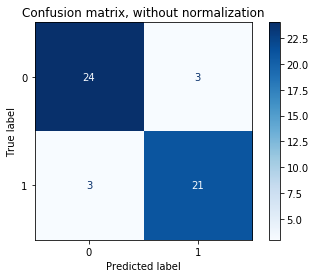

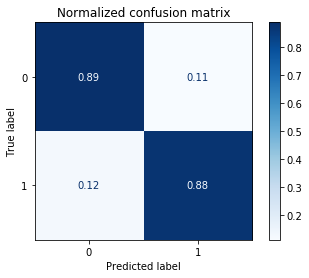

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.88      0.88      0.88        24

    accuracy                           0.88        51
   macro avg       0.88      0.88      0.88        51
weighted avg       0.88      0.88      0.88        51



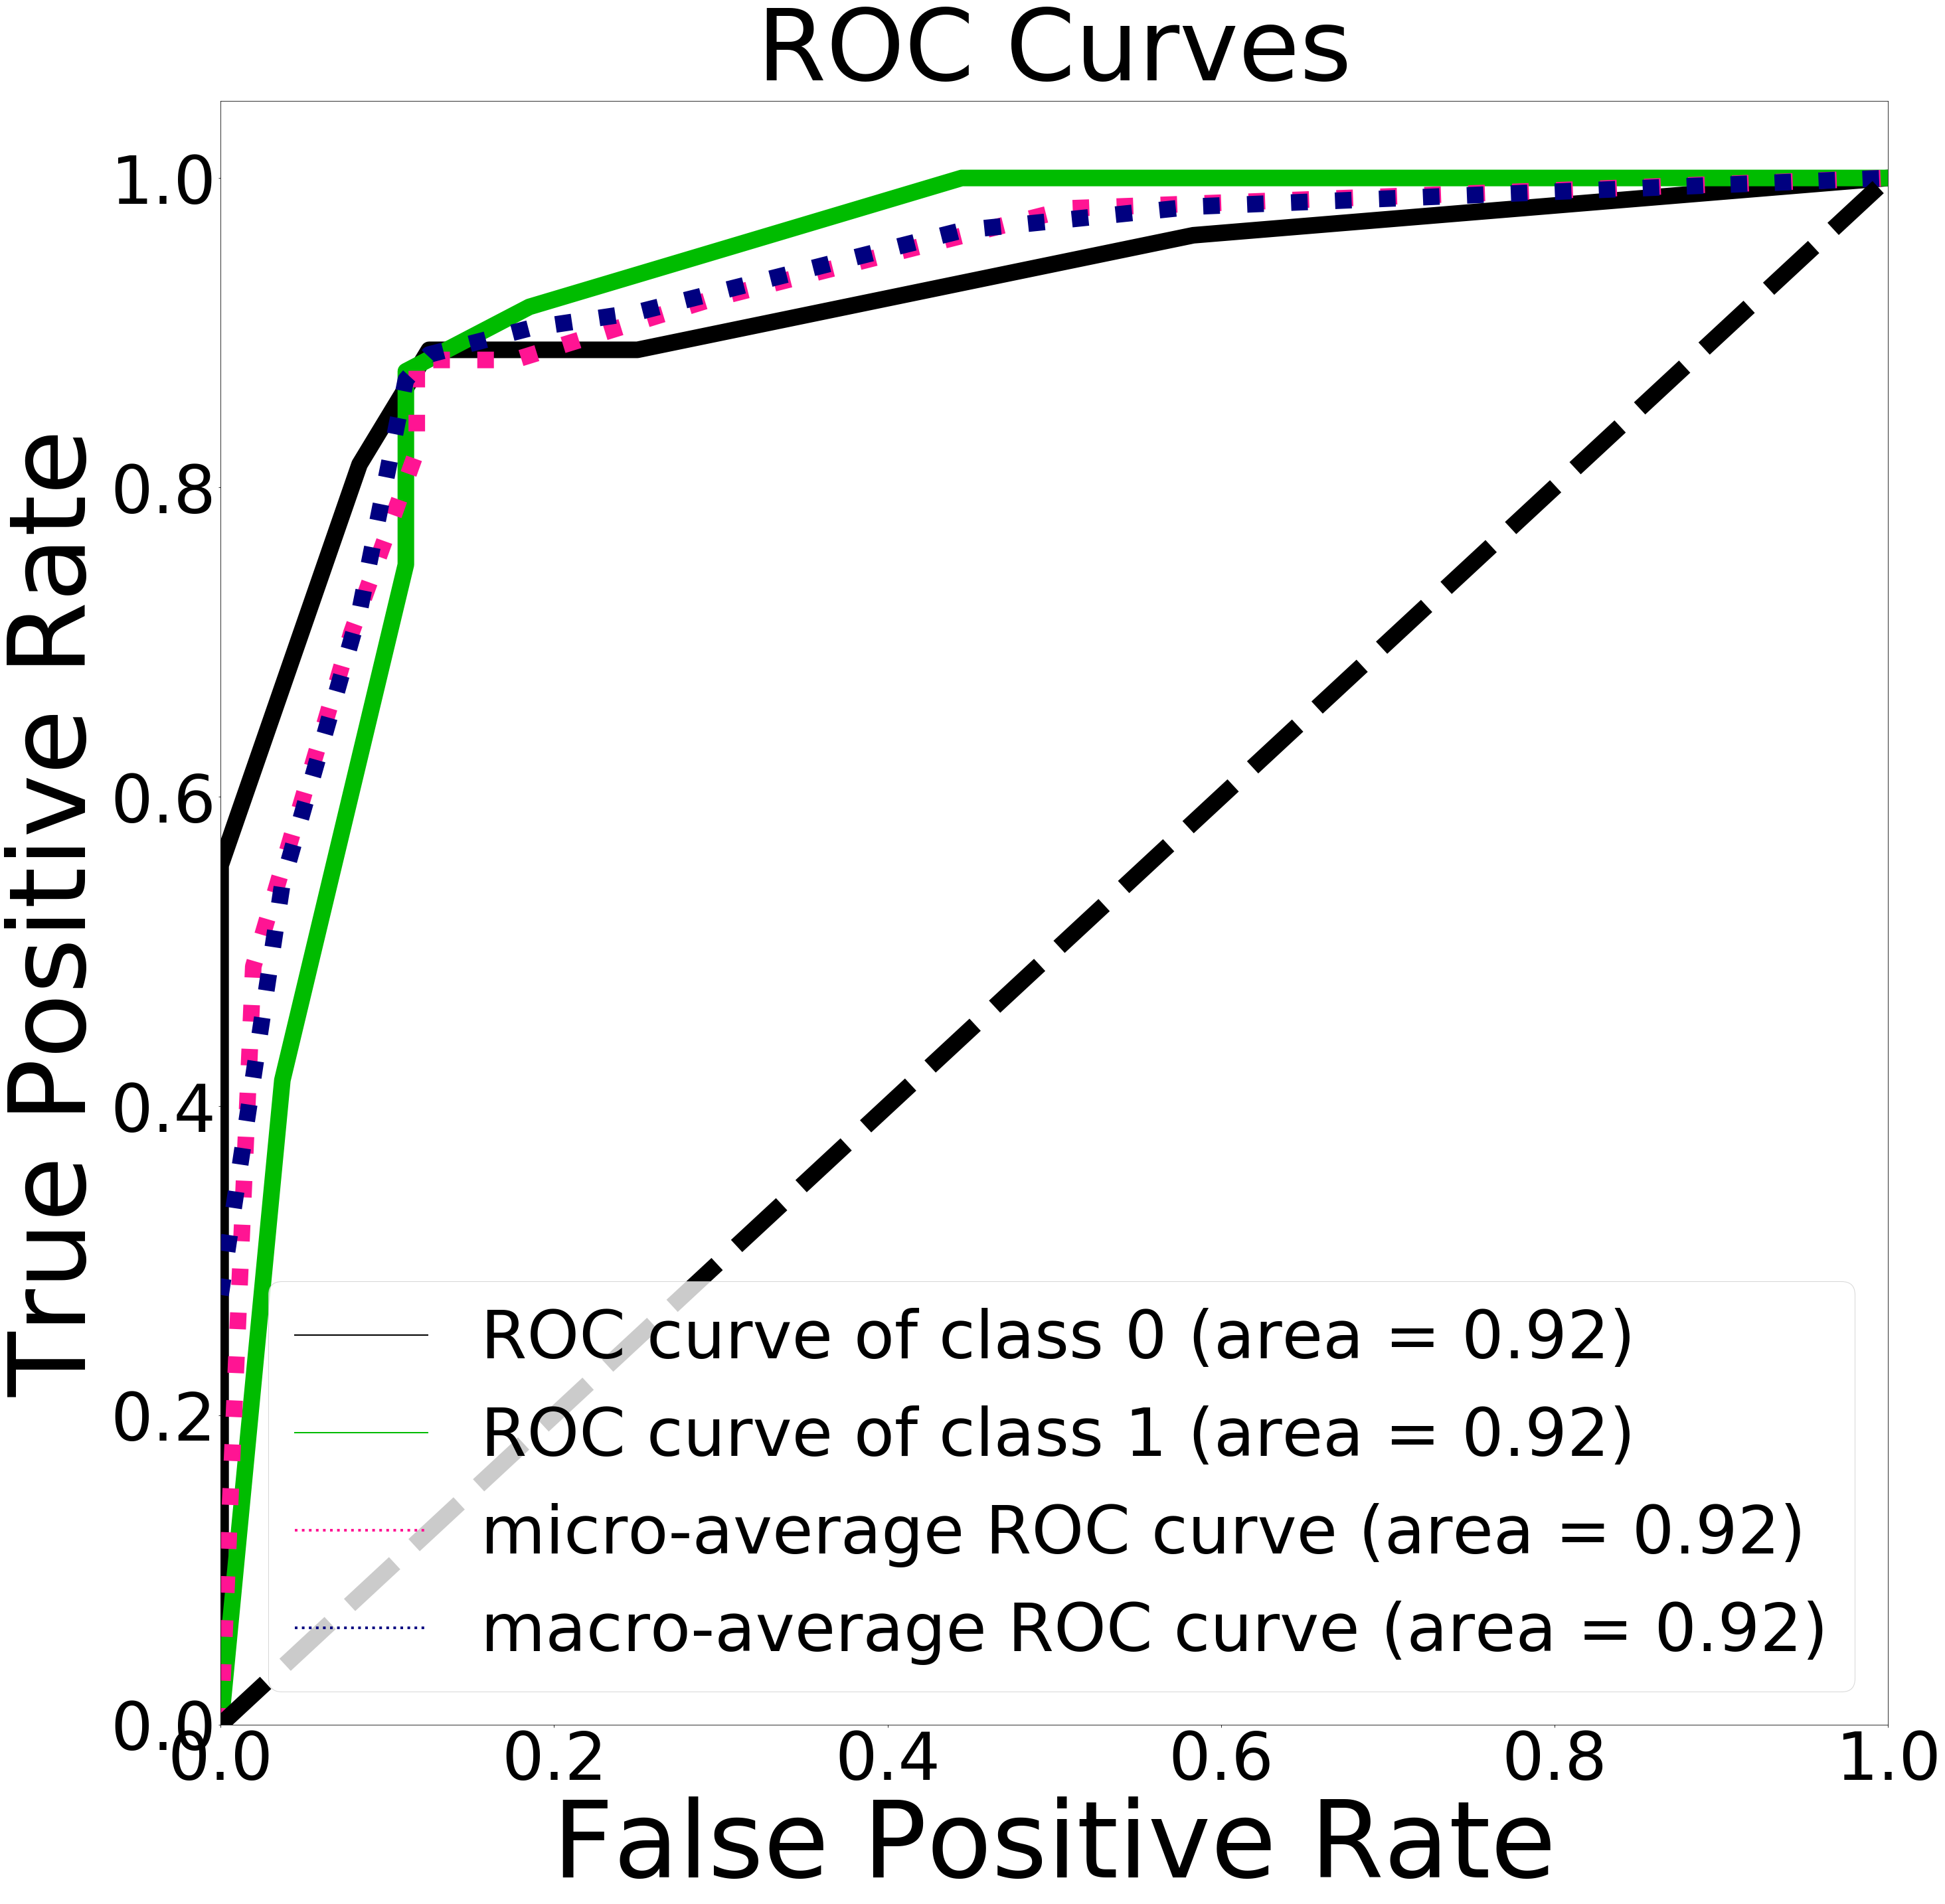

Average precision-recall score Random forest: 0.82


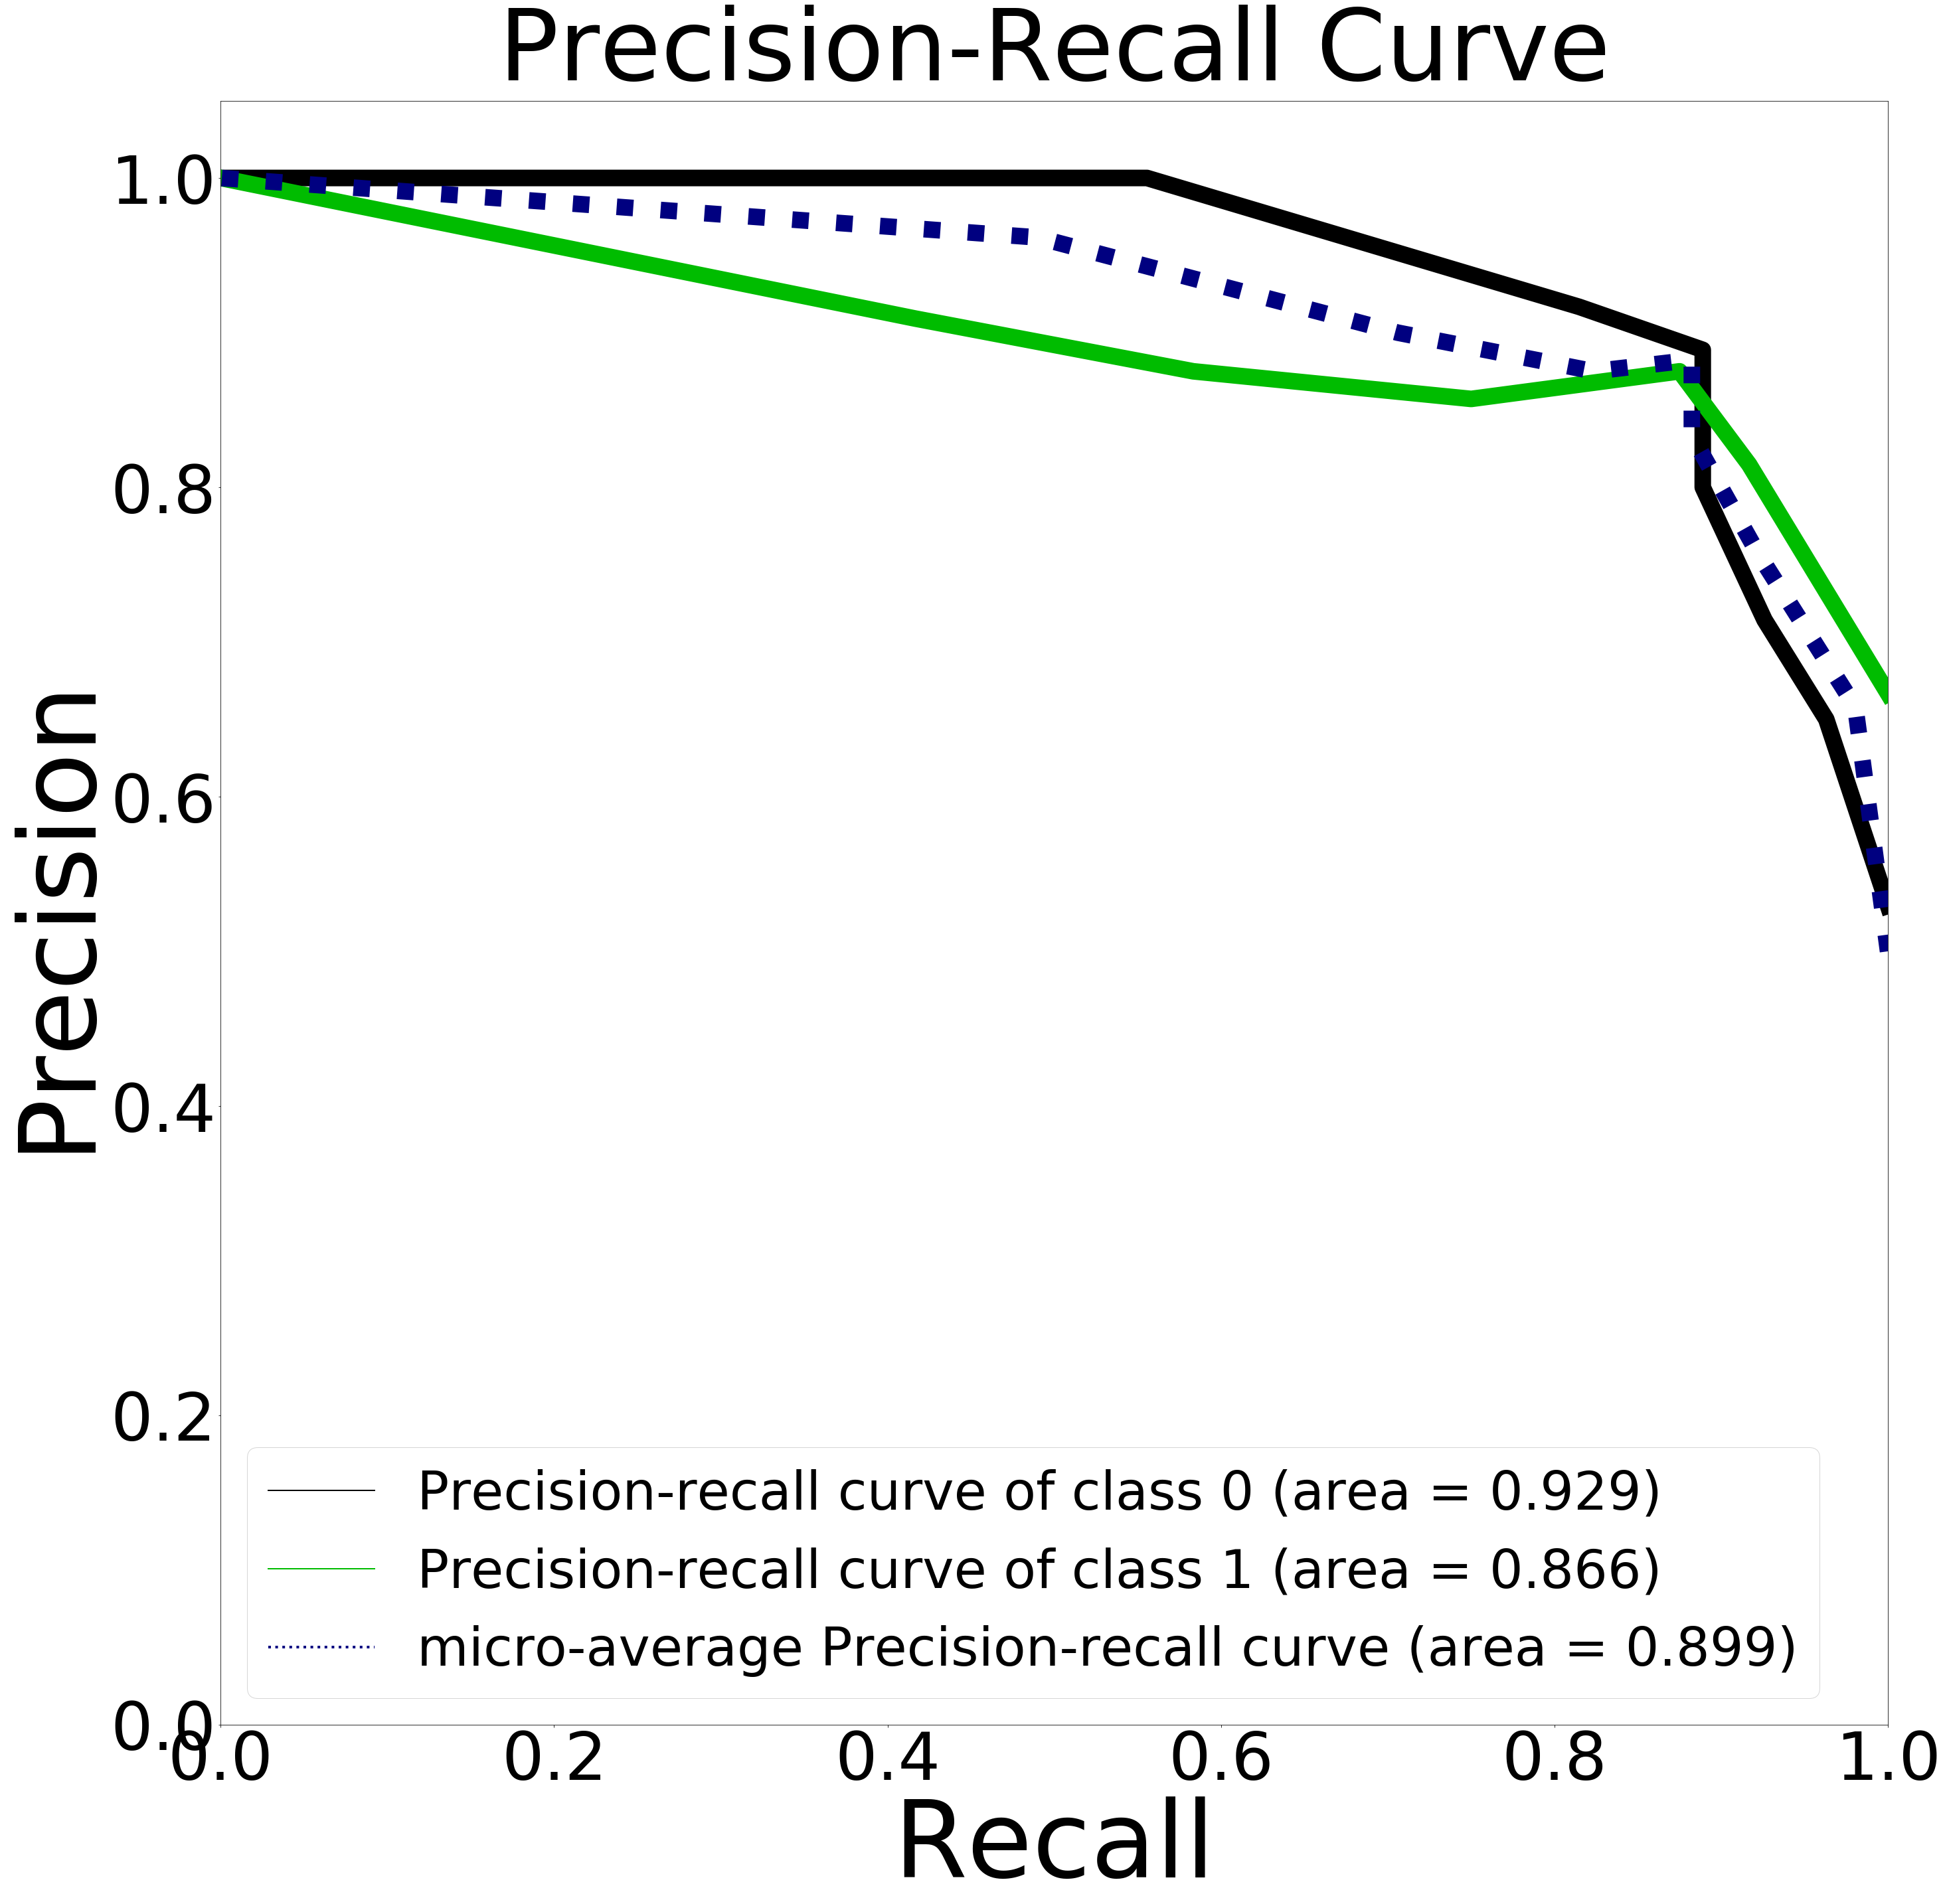

In [13]:
#KNN Classifier best cluster
neighbour = KNeighborsClassifier(n_neighbors = 9).fit(X_train,y_train)
y_predict_KNN = neighbour.predict(X_val)
print("Test set Accuracy for k 9 = " , accuracy_score(y_val, y_predict_KNN))
plot_graphs(neighbour,X_val,y_val, y_predict_KNN)

In [7]:
#Random Forest Classifier Classifier Testing
md =0
while md < 1000:
    md = md+100
    championsTree = RandomForestClassifier(n_estimators = md)
    championsTree.fit(X_train,y_train)
    predict_tree = championsTree.predict(X_val)
    print("Random Forests's Accuracy for Tress = ", md , ":" , accuracy_score(y_val, predict_tree))

Random Forests's Accuracy for Tress =  100 : 0.9215686274509803
Random Forests's Accuracy for Tress =  200 : 0.9019607843137255
Random Forests's Accuracy for Tress =  300 : 0.9019607843137255
Random Forests's Accuracy for Tress =  400 : 0.9019607843137255
Random Forests's Accuracy for Tress =  500 : 0.8823529411764706
Random Forests's Accuracy for Tress =  600 : 0.9019607843137255
Random Forests's Accuracy for Tress =  700 : 0.9019607843137255
Random Forests's Accuracy for Tress =  800 : 0.9019607843137255
Random Forests's Accuracy for Tress =  900 : 0.9019607843137255
Random Forests's Accuracy for Tress =  1000 : 0.9019607843137255


Minimum value for Trees that improves results = 400
Confusion matrix, without normalization
[[25  2]
 [ 4 20]]
Normalized confusion matrix
[[0.92592593 0.07407407]
 [0.16666667 0.83333333]]


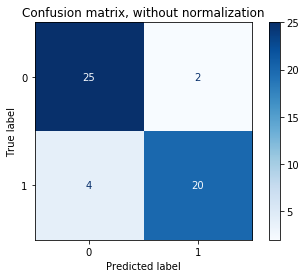

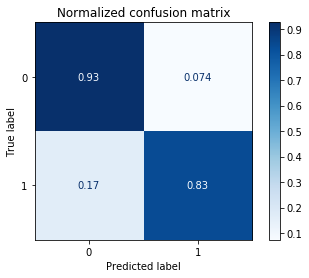

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.91      0.83      0.87        24

    accuracy                           0.88        51
   macro avg       0.89      0.88      0.88        51
weighted avg       0.88      0.88      0.88        51



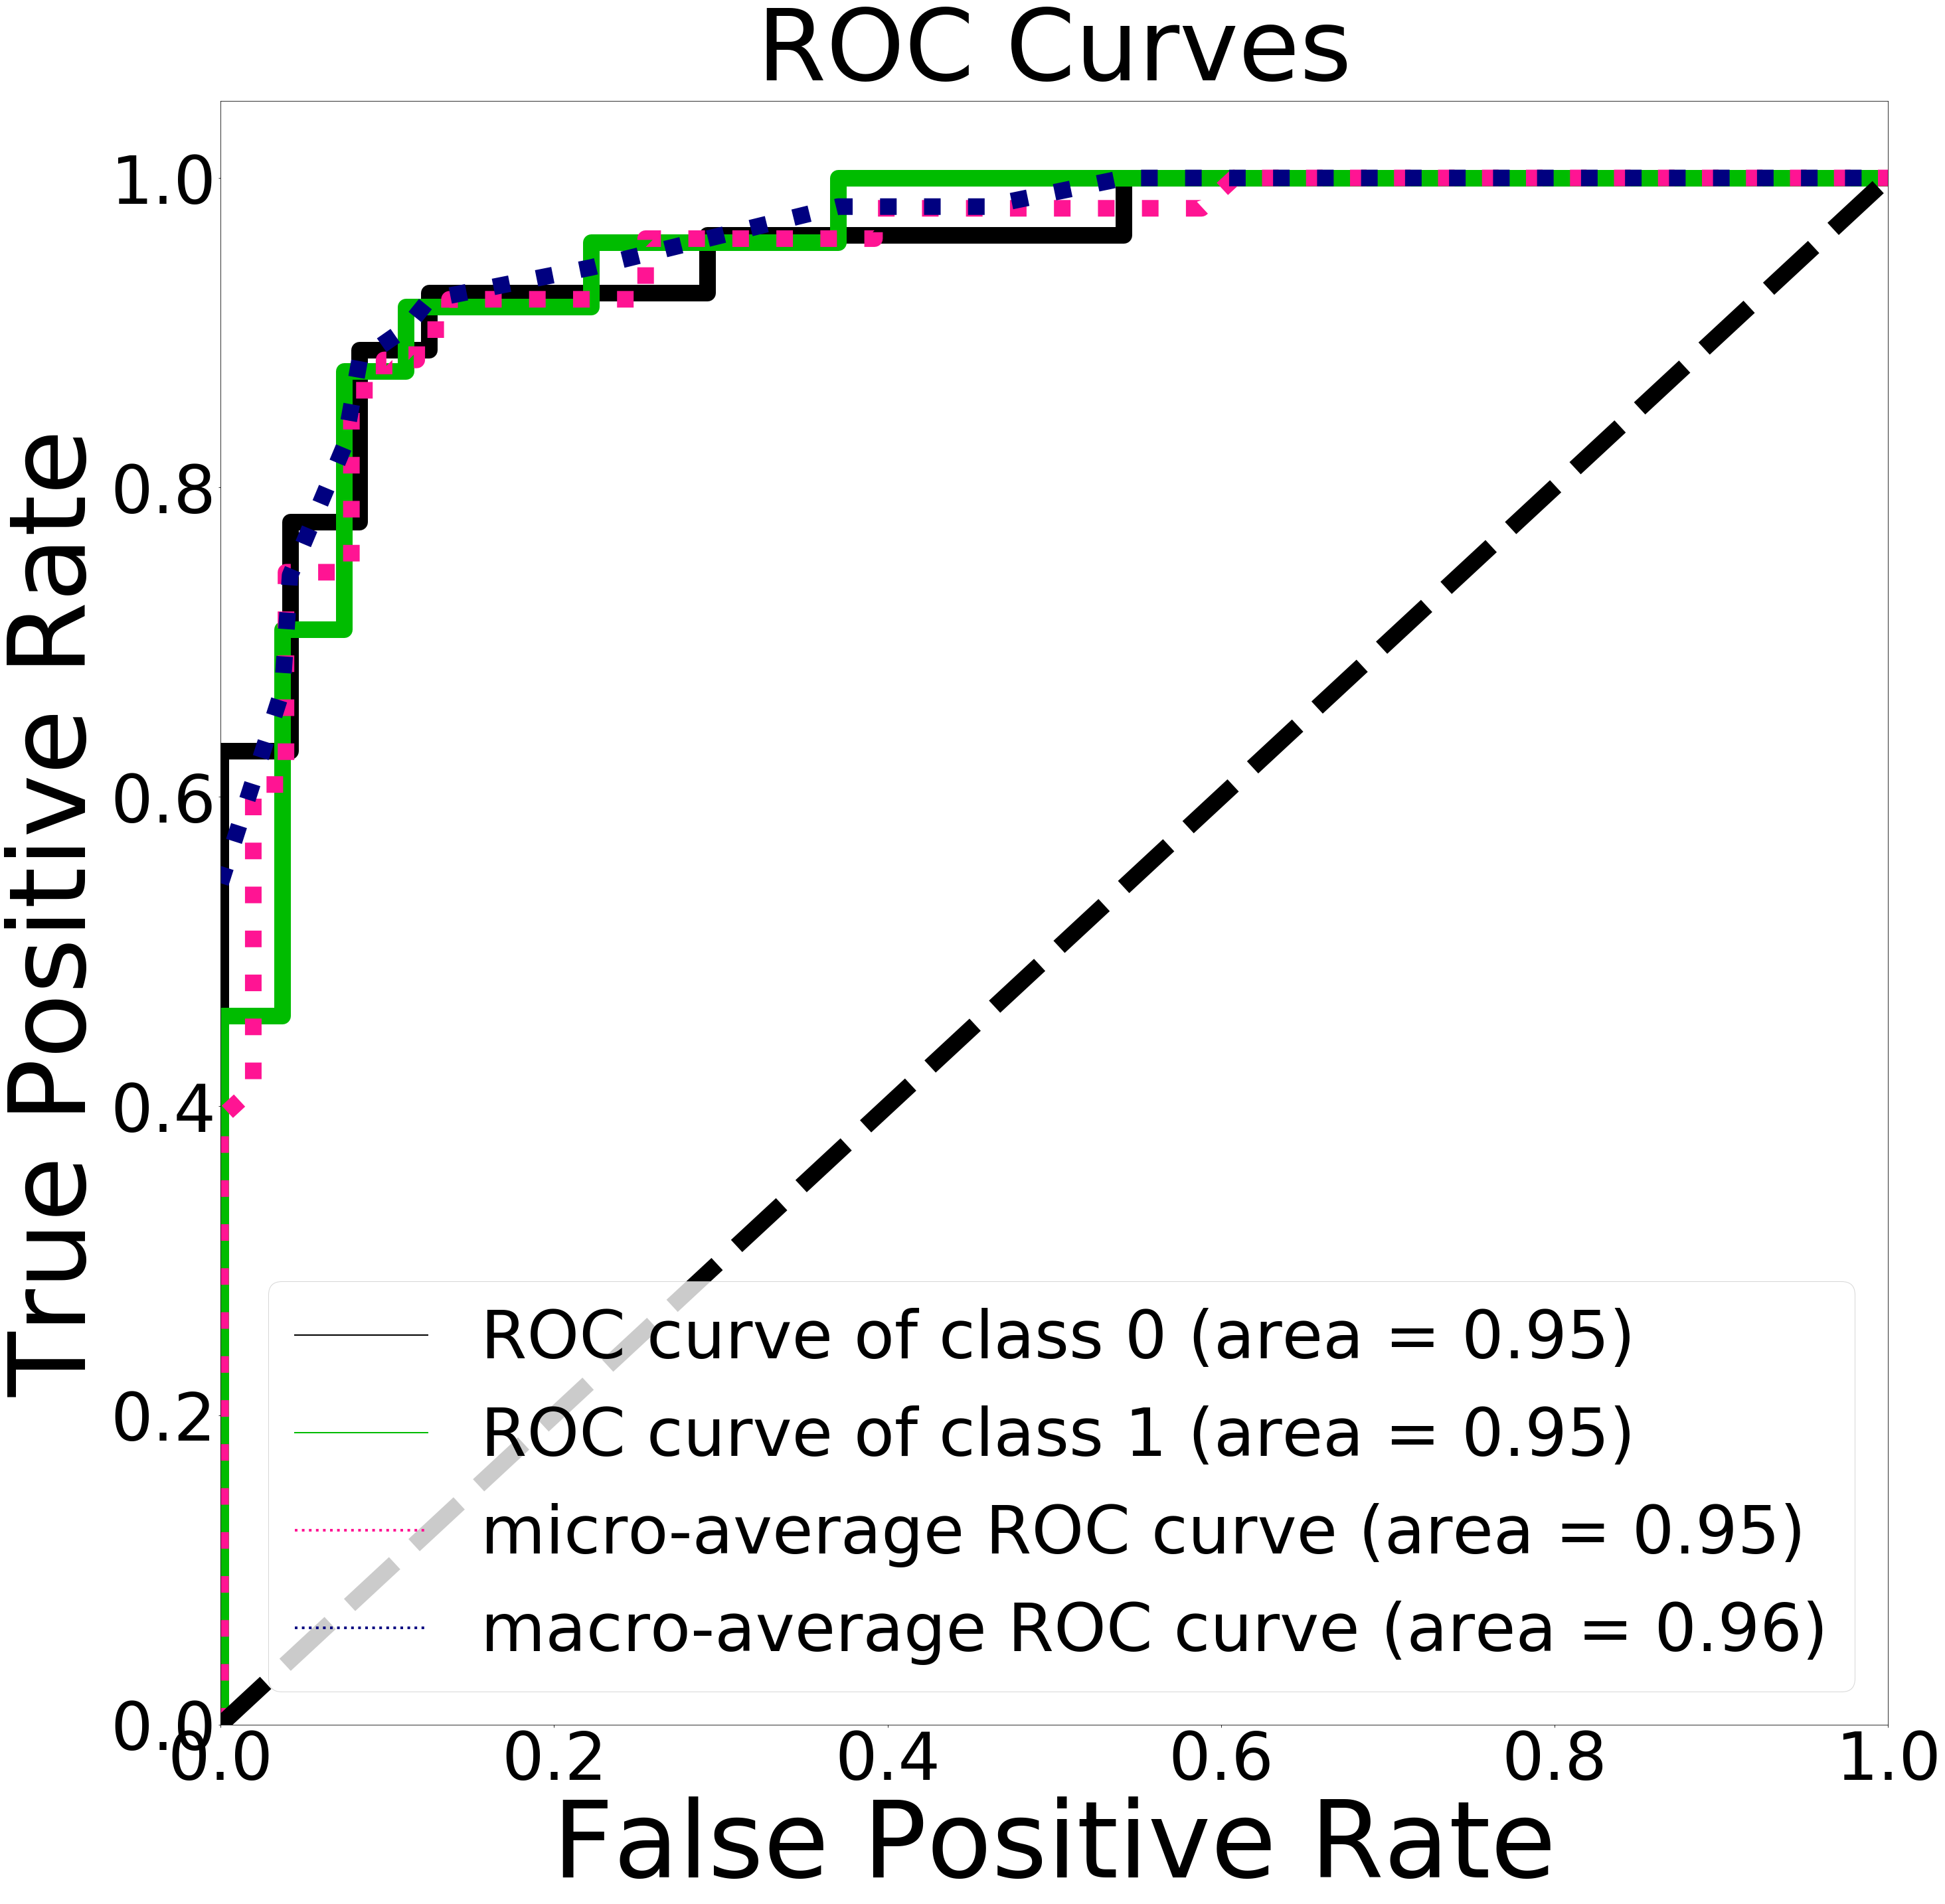

Average precision-recall score Random forest: 0.84


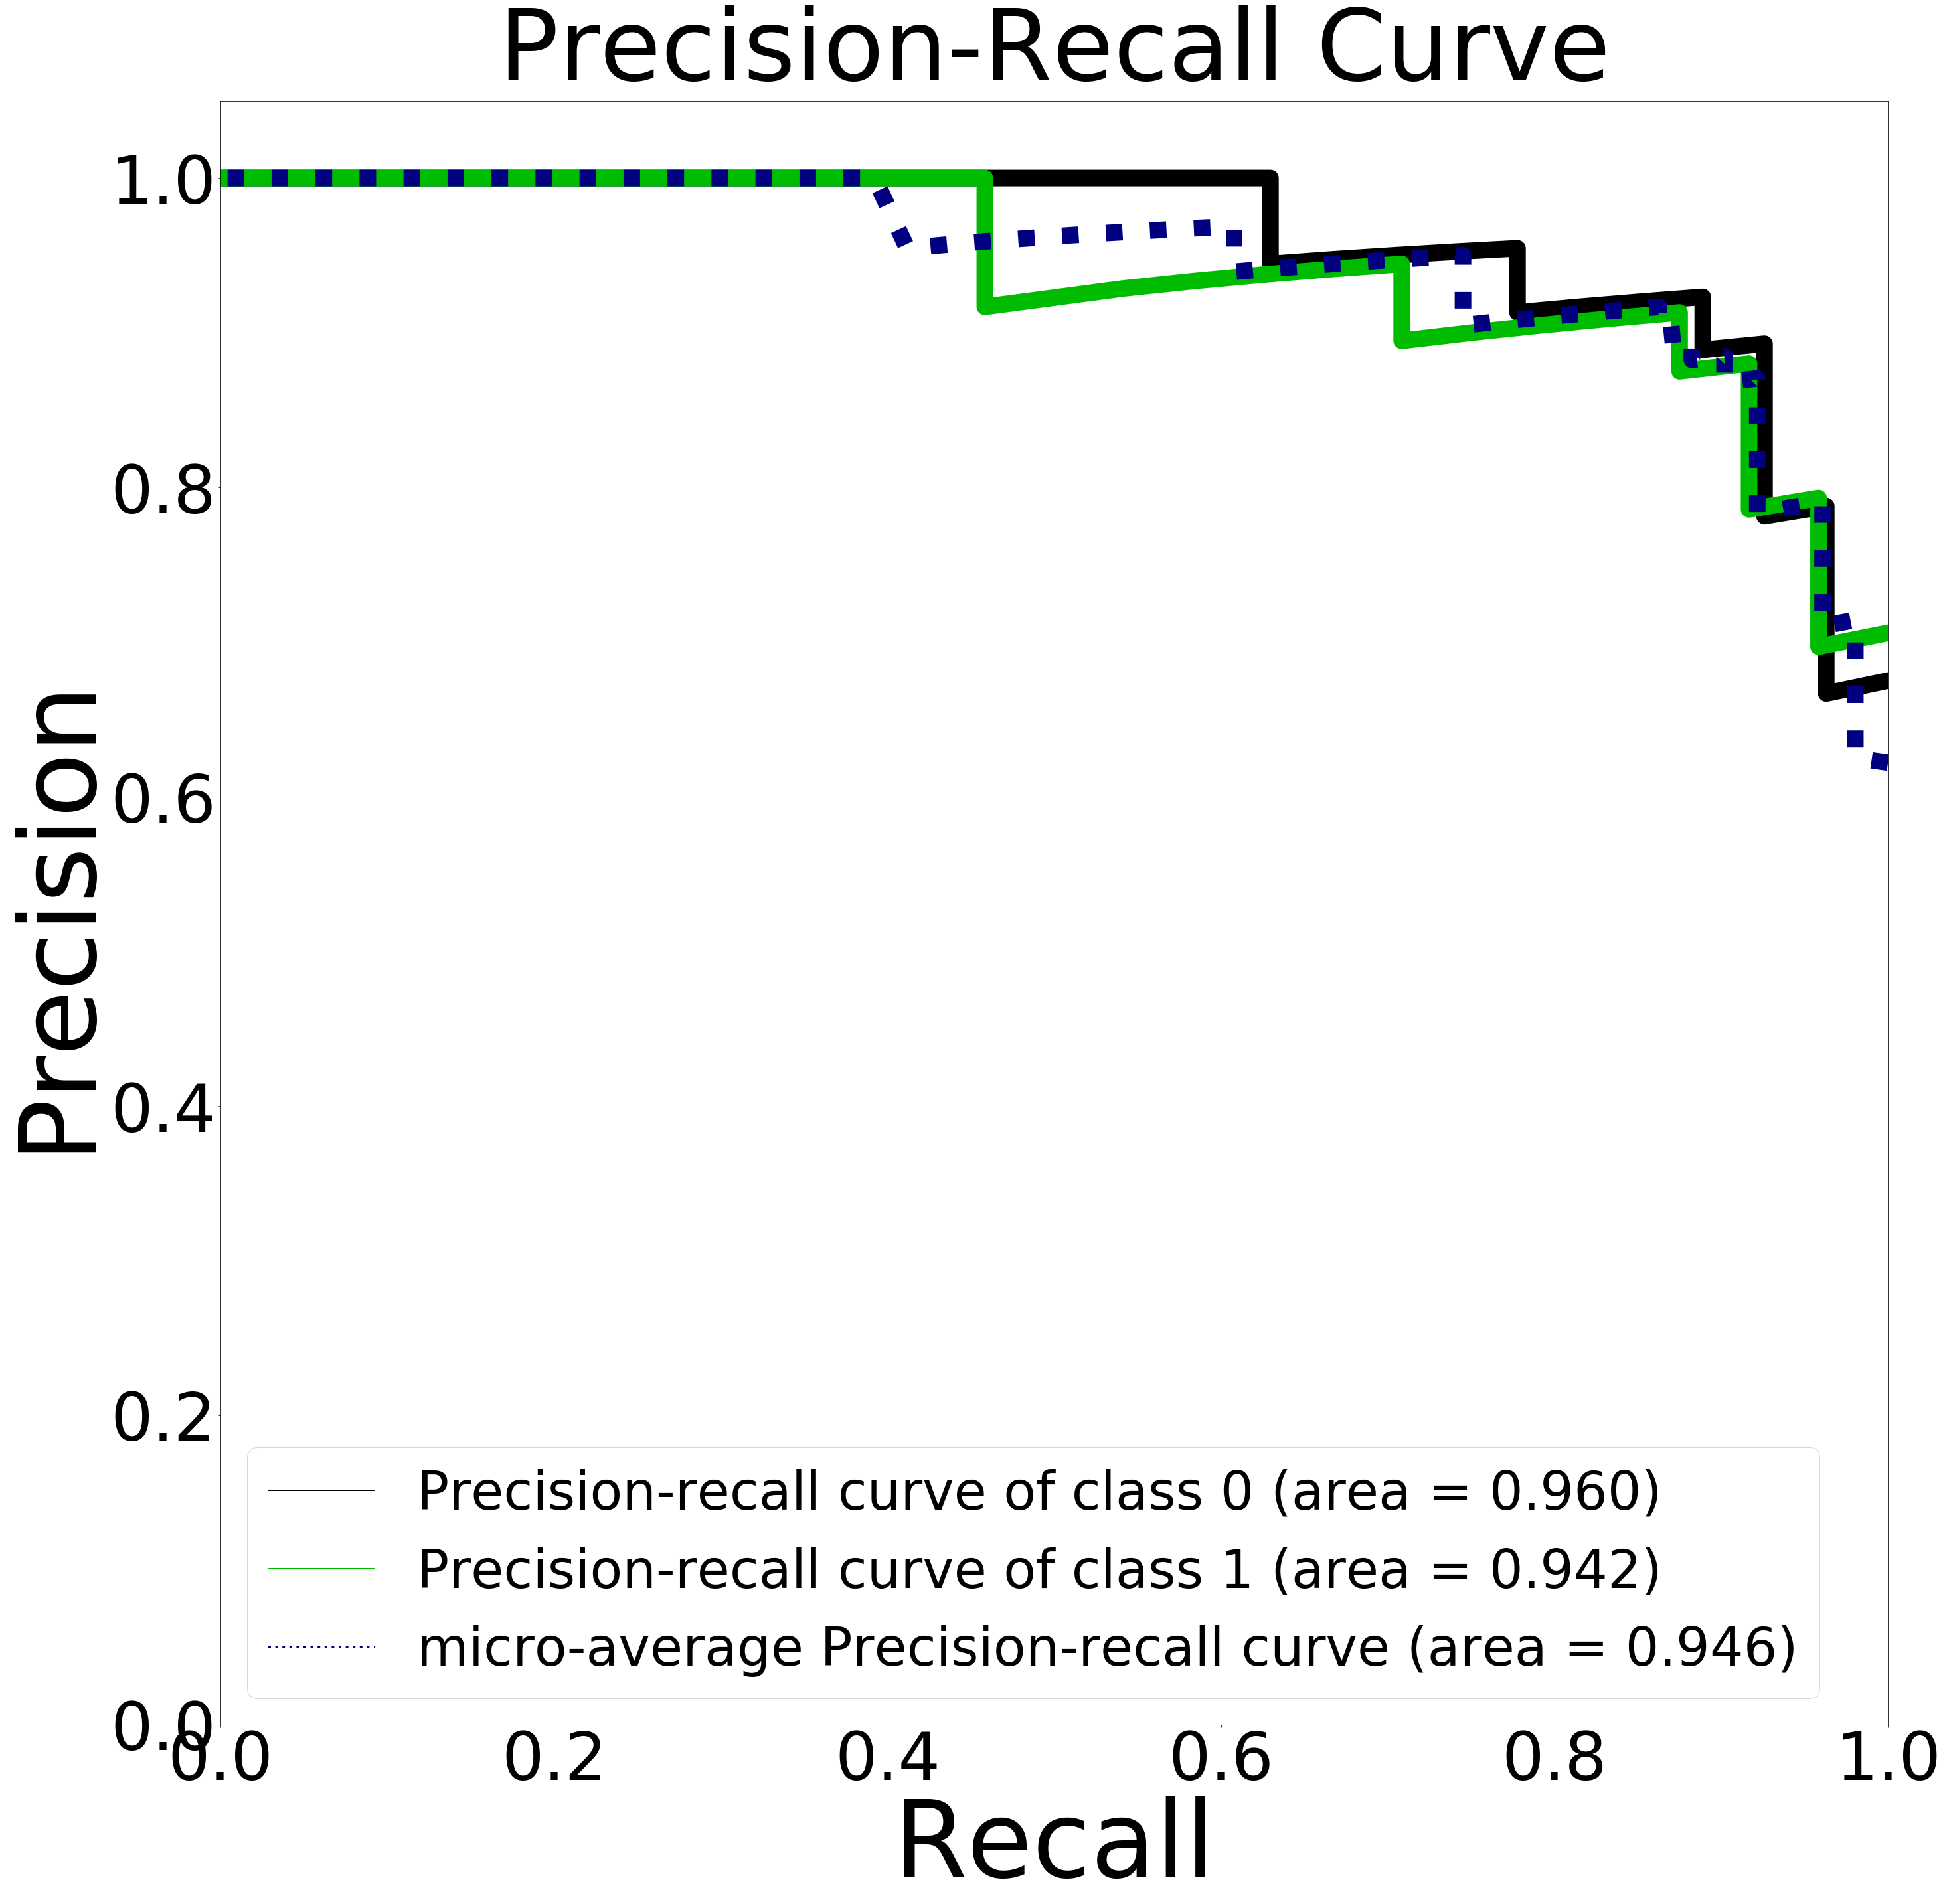

In [12]:
#Random Forest Classifier best Tree counts
print ("Minimum value for Trees that improves results = 400")
championsTree = RandomForestClassifier(n_estimators = 400)
championsTree.fit(X_train,y_train)
predict_tree = championsTree.predict(X_val)
plot_graphs(championsTree,X_val,y_val, predict_tree)

In [8]:
#Suport Vector Machine Testing
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy for Radial basis function:" , accuracy_score(y_val, y_svm))
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy for Linear:" , accuracy_score(y_val, y_svm))
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy for Polynomial:" , accuracy_score(y_val, y_svm))
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy for Sigmoid:" , accuracy_score(y_val, y_svm))

Support vector machine accuracy for Radial basis function: 0.8627450980392157
Support vector machine accuracy for Linear: 0.8627450980392157
Support vector machine accuracy for Polynomial: 0.7843137254901961
Support vector machine accuracy for Sigmoid: 0.7647058823529411


As best score provided with Radial we will train it in the same.
Support vector machine accuracy Best Kernel score : 0.8627450980392157
Confusion matrix, without normalization
[[24  3]
 [ 4 20]]
Normalized confusion matrix
[[0.88888889 0.11111111]
 [0.16666667 0.83333333]]


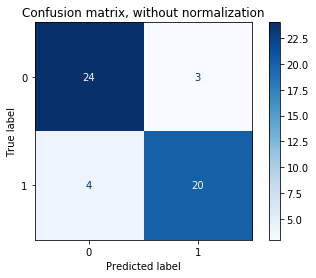

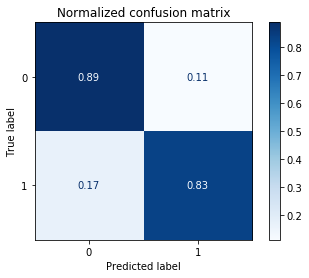

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.87      0.83      0.85        24

    accuracy                           0.86        51
   macro avg       0.86      0.86      0.86        51
weighted avg       0.86      0.86      0.86        51



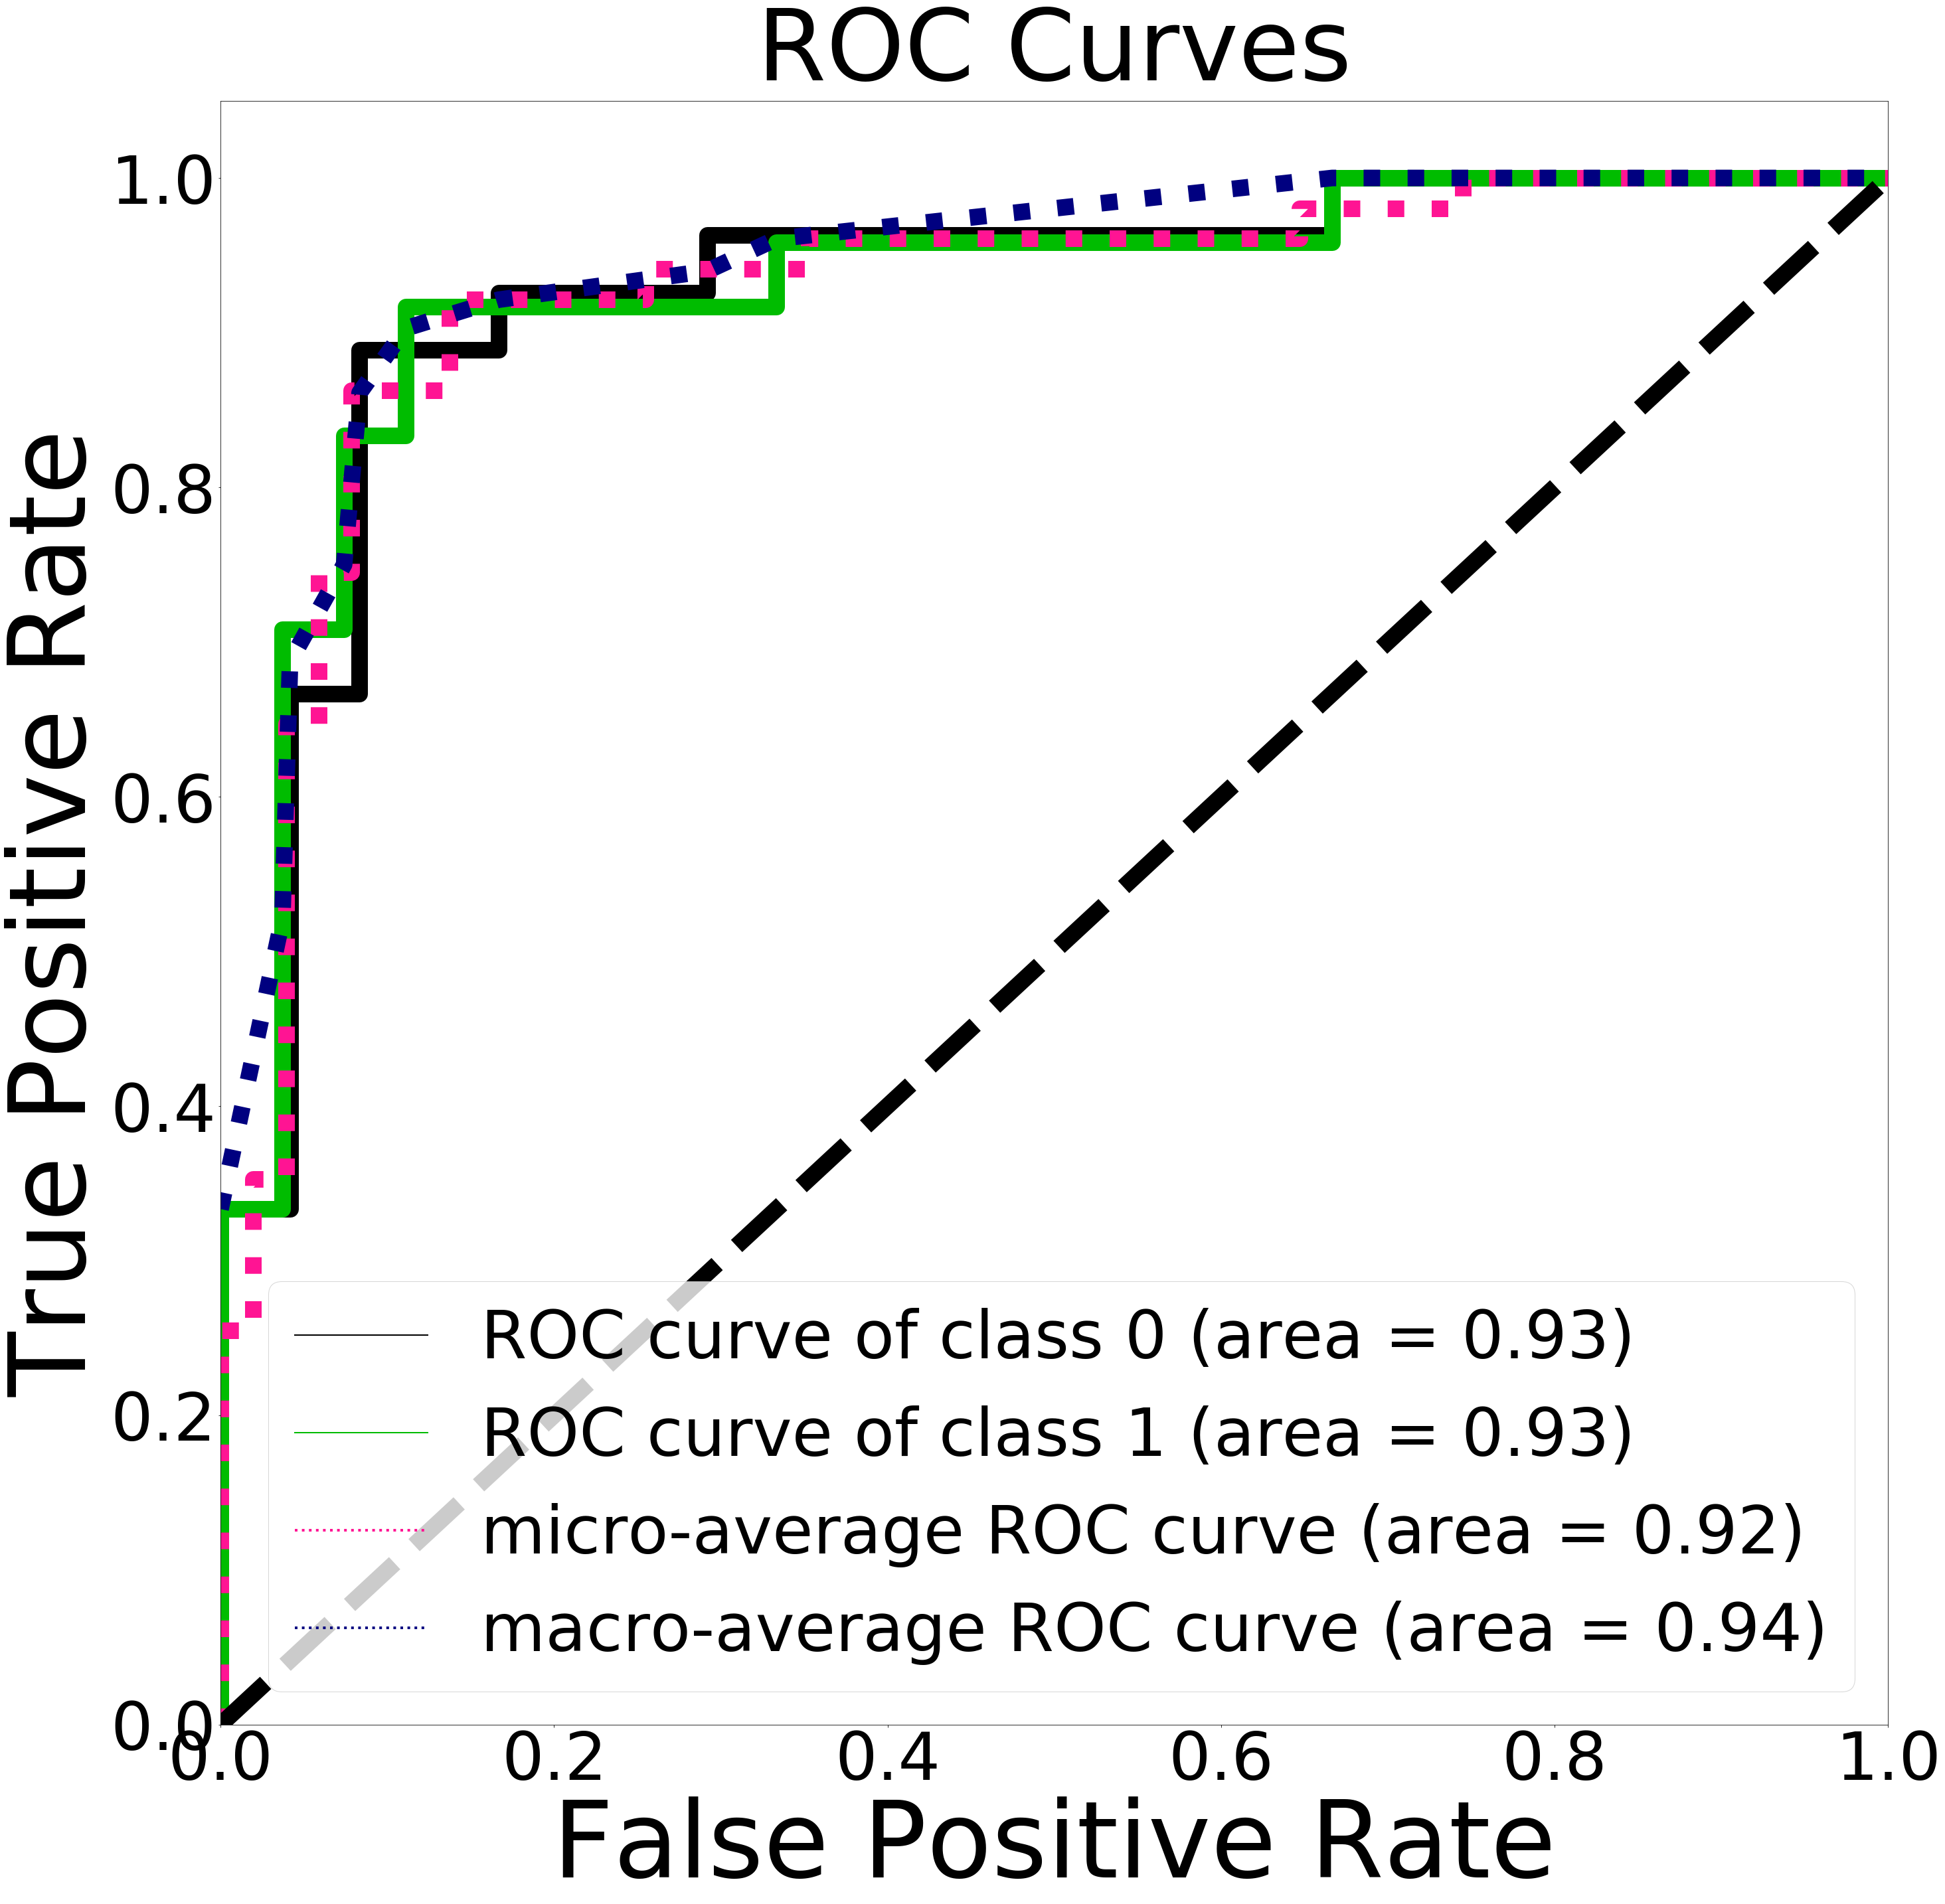

Average precision-recall score Random forest: 0.80


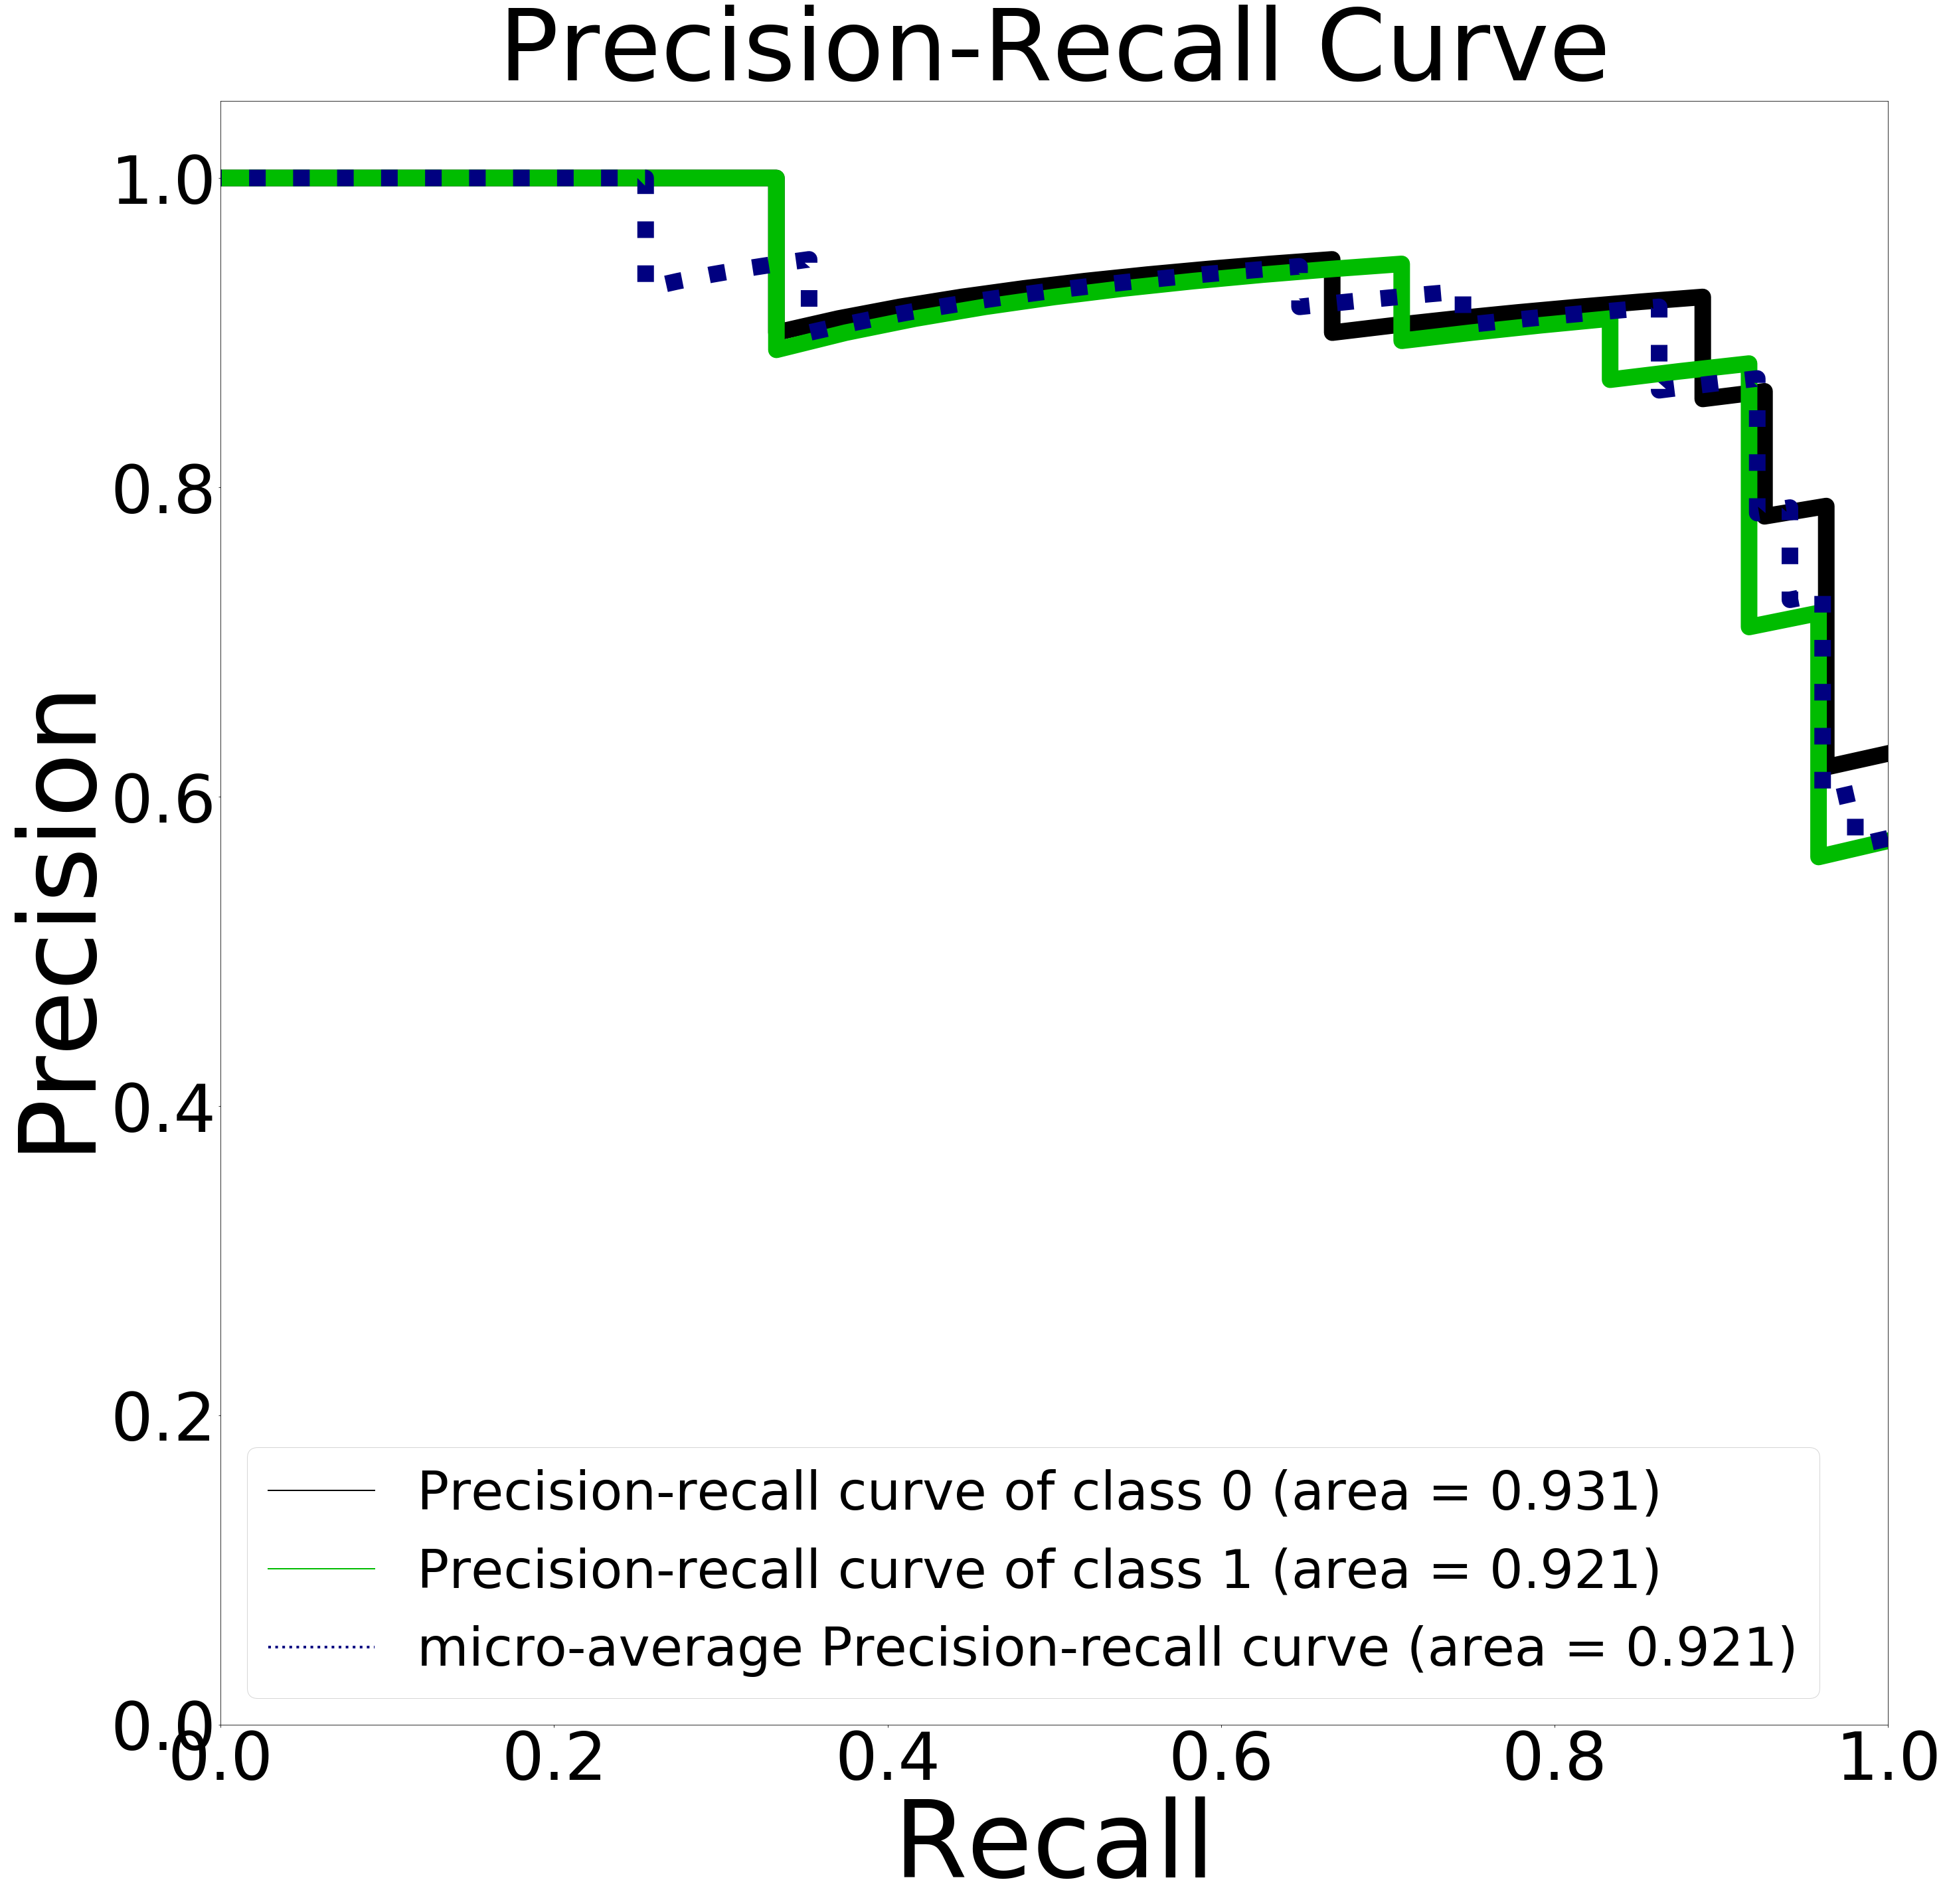

In [11]:
#SVM best Transforming method
print("As best score provided with Radial we will train it in the same.")
clf = svm.SVC(kernel='rbf',probability=True)
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy Best Kernel score :" , accuracy_score(y_val, y_svm))
plot_graphs(clf,X_val,y_val, y_svm)

In [9]:
#Neural Network Classifier Testing
neuro = MLPClassifier(learning_rate='constant',max_iter=800)
neuro.fit(X_train, y_train)
y_neuro = 0
y_neuro = neuro.predict(X_val)
print("MLPC accuracy for Constant Learning:" , accuracy_score(y_val, y_neuro))
neuro = MLPClassifier(learning_rate='invscaling',max_iter=800)
neuro.fit(X_train, y_train)
y_neuro = 0
y_neuro = neuro.predict(X_val)
print("MLPC accuracy for invscaling Learning:" , accuracy_score(y_val, y_neuro))
neuro = MLPClassifier(learning_rate='adaptive',max_iter=800)
neuro.fit(X_train, y_train)
y_neuro = 0
y_neuro = neuro.predict(X_val)
print("MLPC accuracy for adaptive Learning:" , accuracy_score(y_val, y_neuro))

MLPC accuracy for Constant Learning: 0.8823529411764706
MLPC accuracy for invscaling Learning: 0.8823529411764706
MLPC accuracy for adaptive Learning: 0.8823529411764706


Confusion matrix, without normalization
[[25  2]
 [ 4 20]]
Normalized confusion matrix
[[0.92592593 0.07407407]
 [0.16666667 0.83333333]]


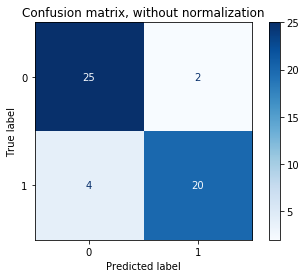

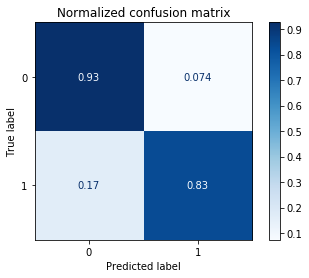

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.91      0.83      0.87        24

    accuracy                           0.88        51
   macro avg       0.89      0.88      0.88        51
weighted avg       0.88      0.88      0.88        51



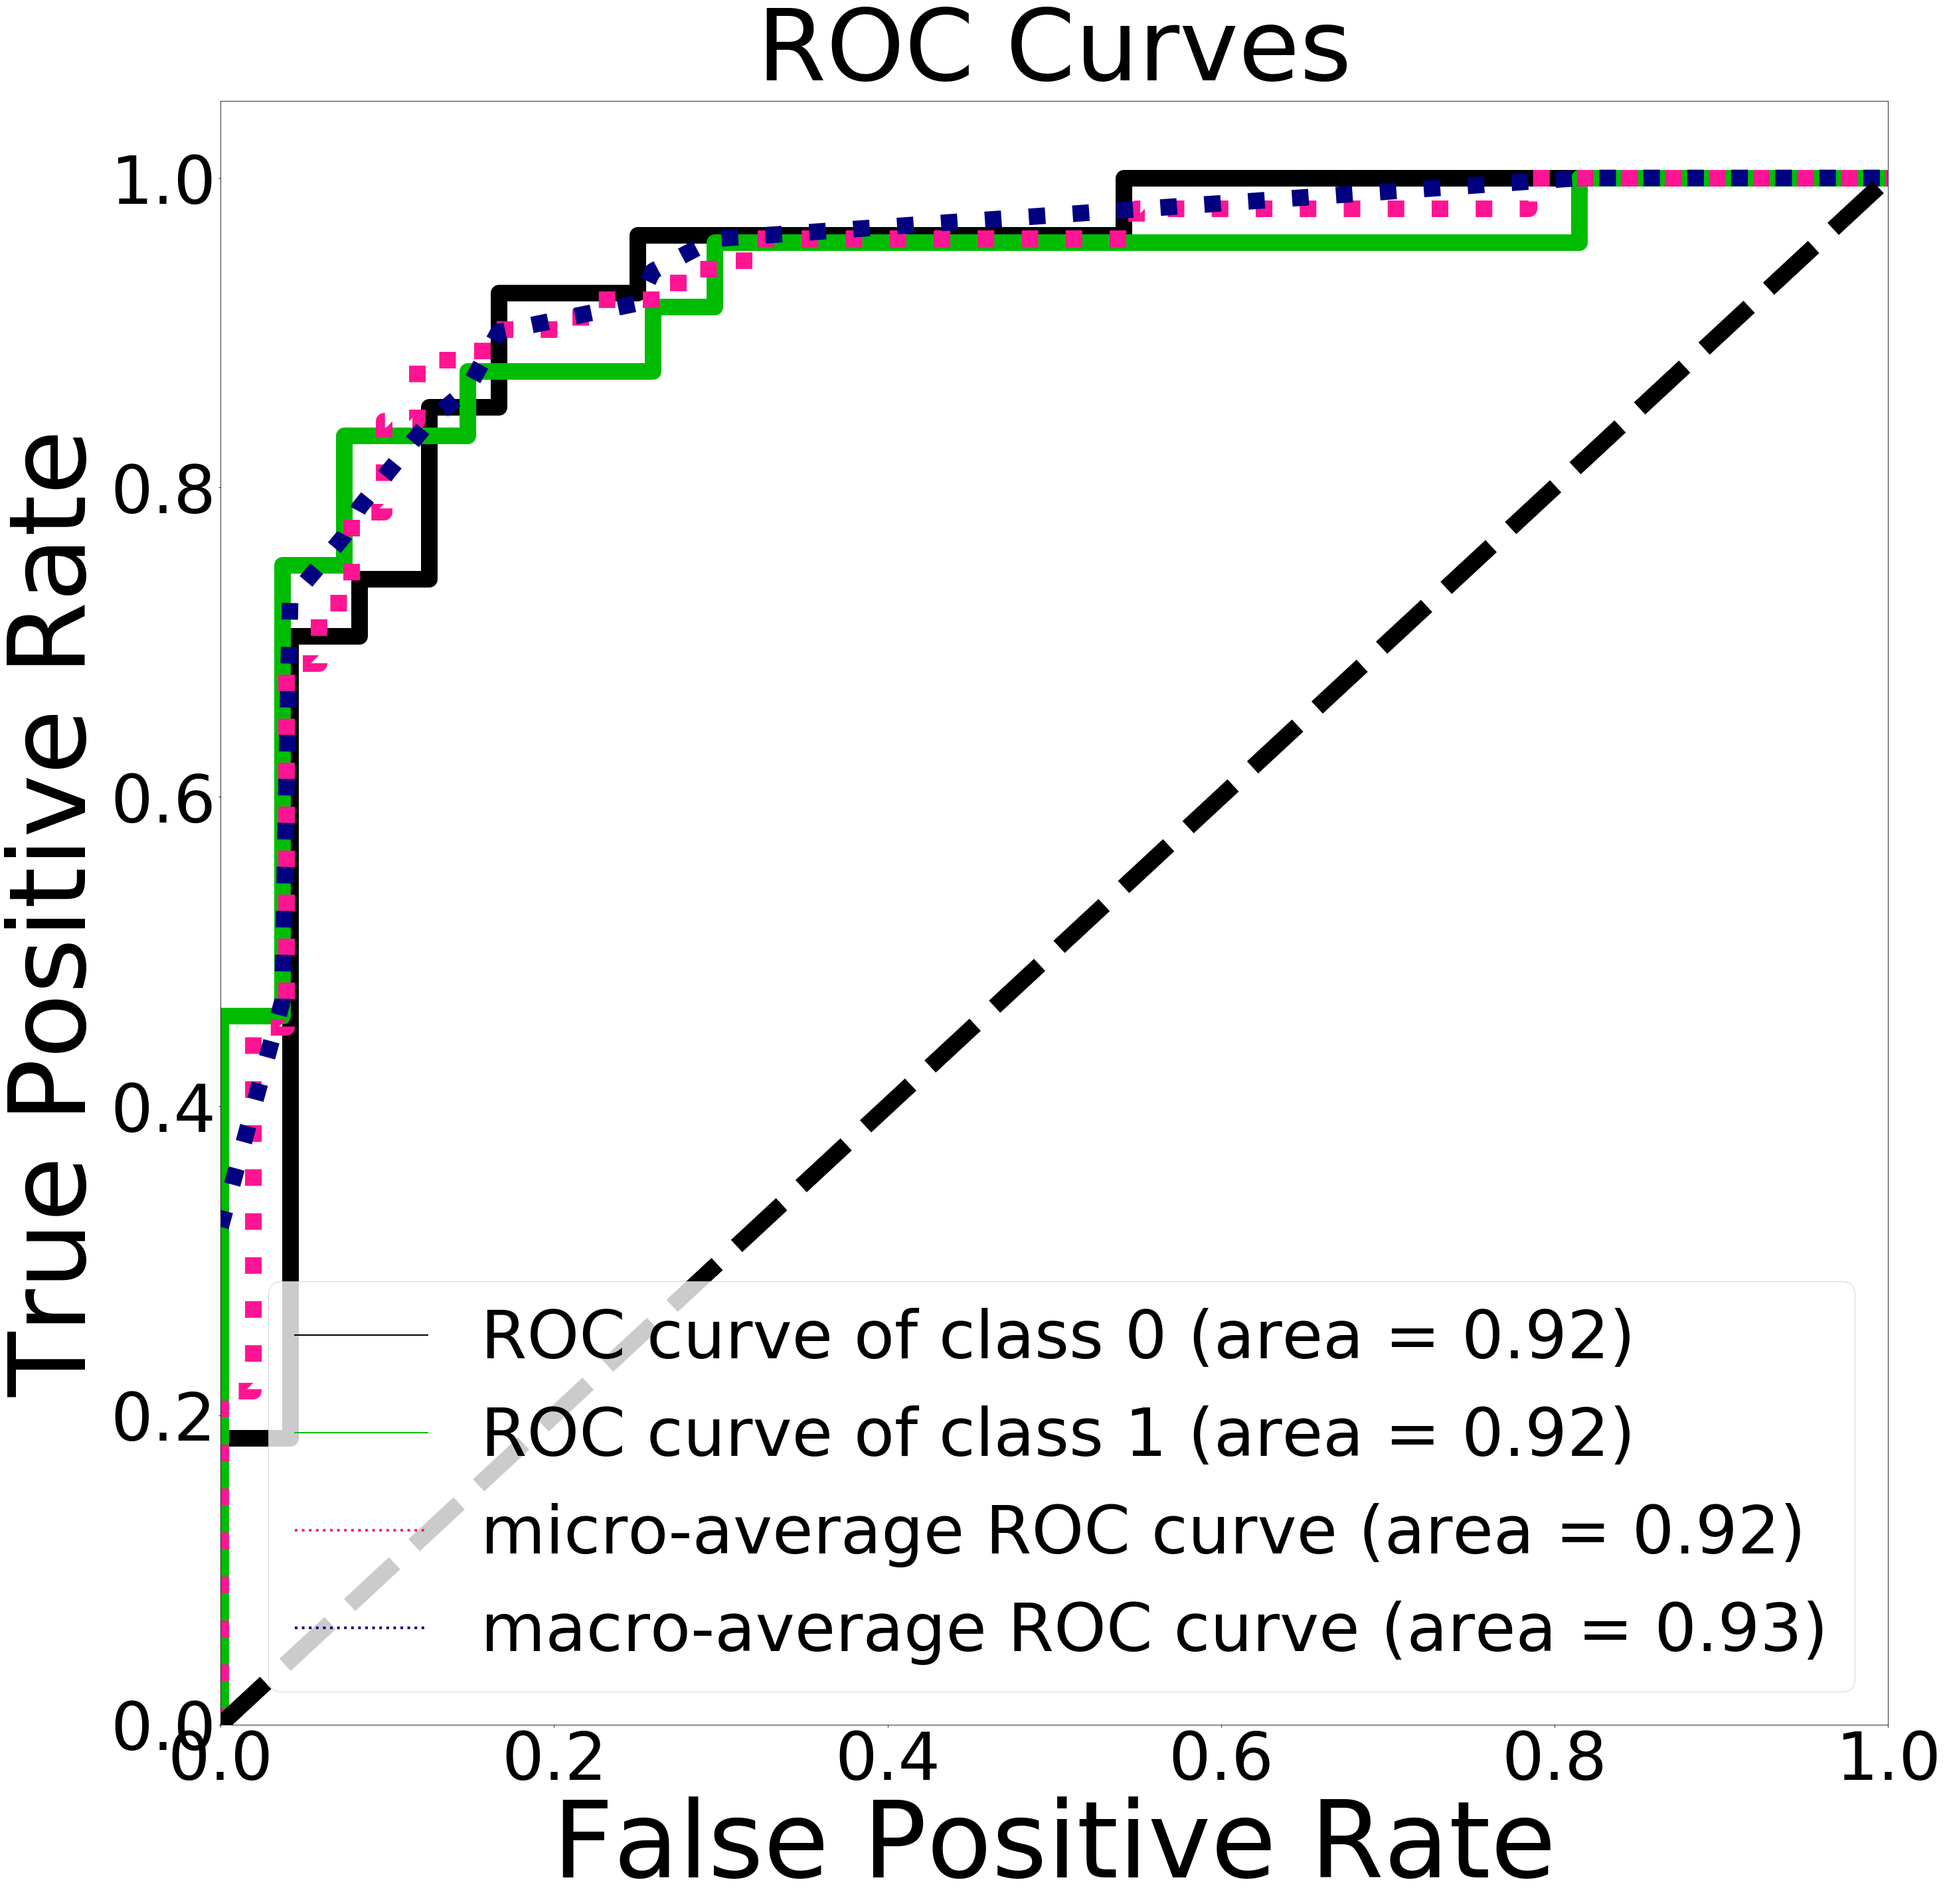

Average precision-recall score Random forest: 0.84


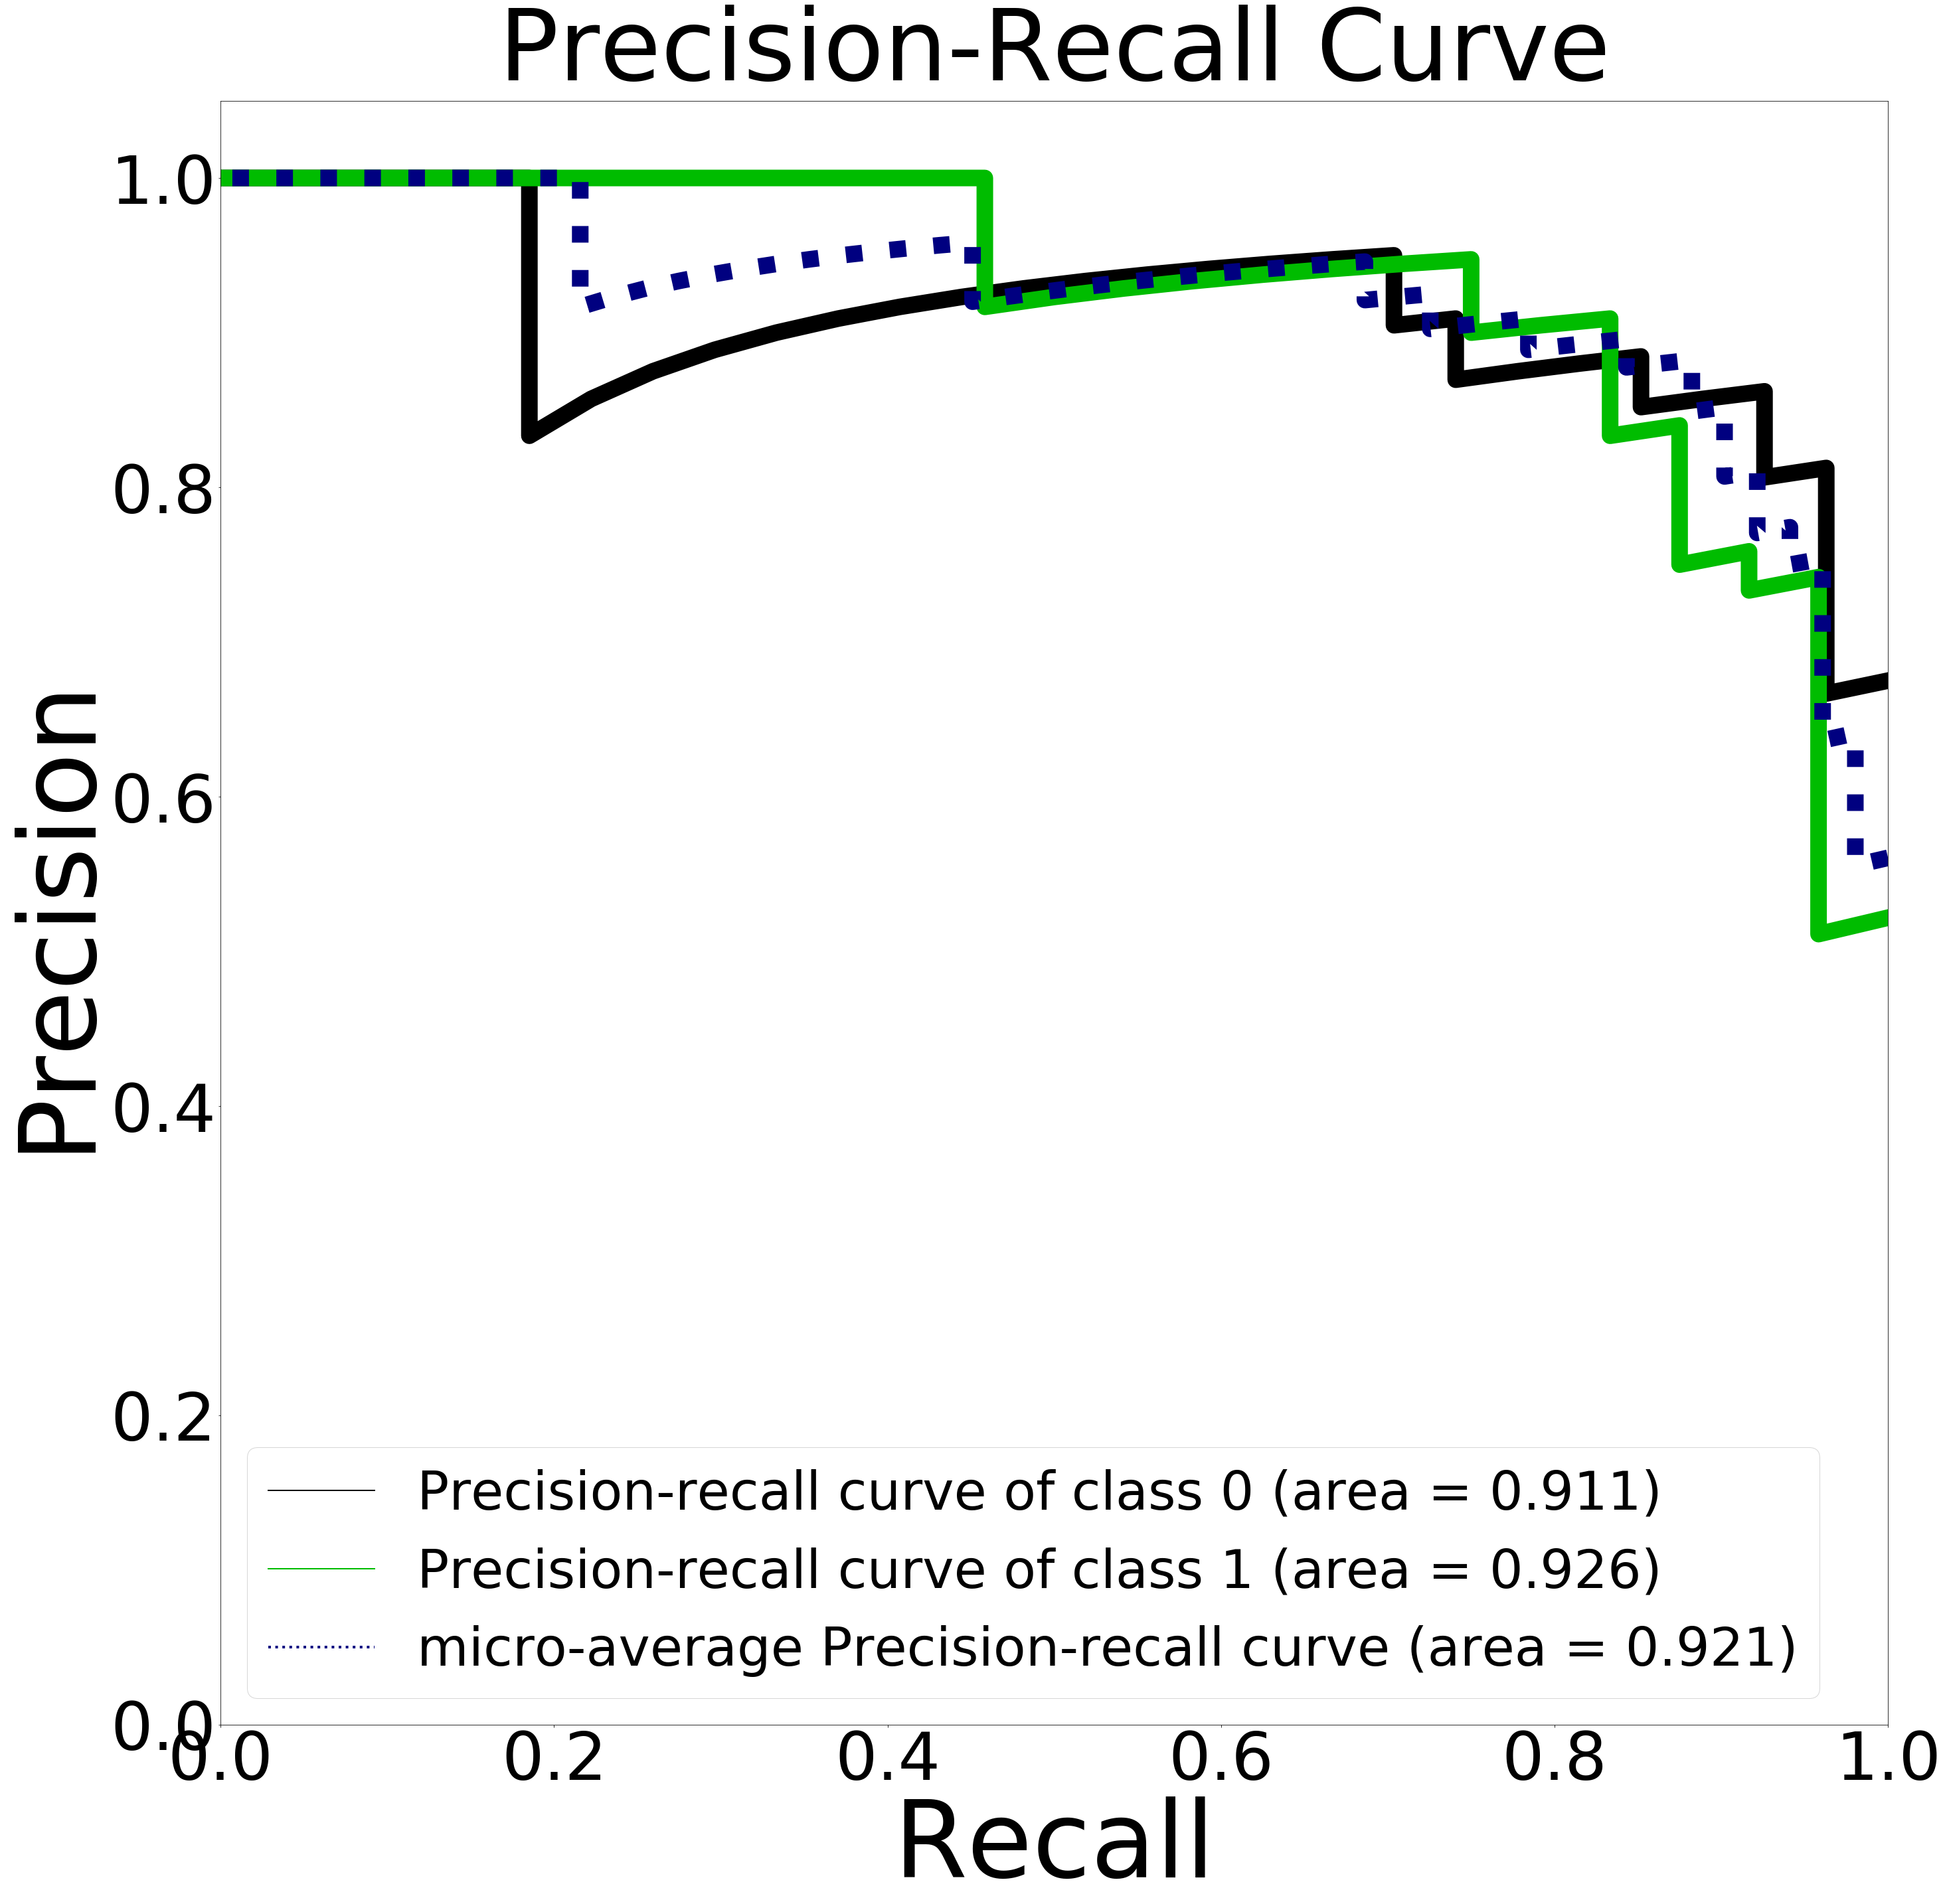

In [10]:
#Neural Network Classifier Best learning rate
neuro = MLPClassifier(learning_rate='constant',max_iter=800)
neuro.fit(X_train, y_train)
y_neuro = 0
neuropredict = neuro.predict(X_val)
plot_graphs(neuro,X_val,y_val, neuropredict)